##Case study:

There is an ever increase in focus of effective requirement. An organization invest a lot of time and resources in search of potential candidates. The investment become loses if the selected candidate do not join organization in the end.


##Challenges:
➢ Recruiter need to understand the chances of candidate of joining the organization.
➢ There are numerous factors for which the candidate can backout of the job.
➢ Confidential data cannot be obtained.

##The variables collected were as follows:

##1. Candidate reference number:
Unique number to identify the candidate
##2. DOJ extended:
Binary variable identifying whether candidate asked for date of joining extension
(Yes/No)
##3. Duration to accept the offer:
Number of days taken by the candidate to accept the offer (continuous variable)
##4. Notice period:
Notice period to be served in the parting company before candidate can join this
company (continuous variable)
##5. Offered band:
Band offered to the candidate based on experience and performance in interview
rounds (categorical variable labelled C0/C1/C2)
##6. Percentage hike expected:
Percentage hike expected by the candidate (continuous variable)
##7. Percentage hike offered
Percentage hike offered by the company (continuous variable)
##8. Percentage difference
Difference of hike offered and hike expected is considered
##9. Joining bonus
Binary variable indicating if joining bonus was given or not (Yes/No)
##10. Gender
Gender of the candidate (Male/Female)
##11. Candidate source
Source from which resume of the candidate was obtained (categorical variables
with categories: Employee referral/Agency/Direct)
##12. Year of experience (in years)
Relevant years of experience of the candidate for the position offered (continuous
variable)
##13. LOB
Line of business for which offer was rolled out (categorical variable)
##14. DOB
Date of birth of the candidate
##15. Joining location
Company location for which offer was rolled out for candidate to join (categorical
variable)
##16. Candidate relocation status
Binary variable indicating whether candidate has to relocate from one city to
another city for joining (Yes/No)
##17. HR status
Final joining status of candidate (Joined/Not-Joined)

##Gathering Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder

import warnings
warnings.filterwarnings(action='ignore')

##Loading our Data

In [2]:
df = pd.read_csv('HR_Data.csv')
df.head()

,SLNO,Candidate.Ref,DOJ.Extended,Duration.to.accept.offer,Notice.period,Offered.band,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Joining.Bonus,Candidate.relocate.actual,Gender,Candidate.Source,Rex.in.Yrs,LOB,Location,Age,Status
0,1,2110407,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,2,2112635,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,3,2112838,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,4,2115021,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
4,5,2115125,Yes,1,120,E2,42.59,42.59,0.00,No,Yes,Male,Employee Referral,6,INFRA,Noida,34,Joined


In [3]:
df.shape

(8998, 18)

In [4]:
df.columns

Index(['SLNO', 'Candidate.Ref', 'DOJ.Extended', 'Duration.to.accept.offer',
       'Notice.period', 'Offered.band', 'Pecent.hike.expected.in.CTC',
       'Percent.hike.offered.in.CTC', 'Percent.difference.CTC',
       'Joining.Bonus', 'Candidate.relocate.actual', 'Gender',
       'Candidate.Source', 'Rex.in.Yrs', 'LOB', 'Location', 'Age', 'Status'],
      dtype='object')

##Observations:

*1. Status column is our target feature  
*2. we have total of 8998 rows and 18 columns in our data  
*3. SLNO is same like our index column so we probably wont need that  
*4. Many column name are joined with a '.' if we replace it with '_' it will be helpful for us  

##Statistical Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8998 entries, 0 to 8997
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8998 non-null   int64  
 1   Candidate.Ref                8998 non-null   int64  
 2   DOJ.Extended                 8998 non-null   object 
 3   Duration.to.accept.offer     8998 non-null   int64  
 4   Notice.period                8998 non-null   int64  
 5   Offered.band                 8998 non-null   object 
 6   Pecent.hike.expected.in.CTC  8998 non-null   float64
 7   Percent.hike.offered.in.CTC  8998 non-null   float64
 8   Percent.difference.CTC       8998 non-null   float64
 9   Joining.Bonus                8998 non-null   object 
 10  Candidate.relocate.actual    8998 non-null   object 
 11  Gender                       8998 non-null   object 
 12  Candidate.Source             8998 non-null   object 
 13  Rex.in.Yrs        

##Observations:

##1. We have 9 numerical columns (including SLNO) and 9 categorical columns 
##2. No missing values in any column

In [6]:
df.describe()

,SLNO,Candidate.Ref,Duration.to.accept.offer,Notice.period,Pecent.hike.expected.in.CTC,Percent.hike.offered.in.CTC,Percent.difference.CTC,Rex.in.Yrs,Age
count,8998.000000,8.998000e+03,8998.000000,8998.000000,8998.000000,8998.00000,8998.000000,8998.000000,8998.000000
mean,5972.247722,2.843815e+06,21.428762,39.282063,43.877143,40.66886,-1.574809,4.239053,29.913647
std,3374.652978,4.864595e+05,25.809202,22.224471,29.826113,36.09506,19.607638,2.547685,4.097889
min,1.000000,2.109586e+06,0.000000,0.000000,-68.830000,-60.53000,-67.270000,0.000000,20.000000
25%,3208.250000,2.386508e+06,3.000000,30.000000,27.270000,22.09000,-8.330000,3.000000,27.000000
50%,5976.500000,2.807490e+06,10.000000,30.000000,40.000000,36.00000,0.000000,4.000000,29.000000
75%,8744.000000,3.300062e+06,33.000000,60.000000,53.850000,50.00000,0.000000,6.000000,34.000000
max,12333.000000,3.836076e+06,224.000000,120.000000,359.770000,471.43000,300.000000,24.000000,60.000000


##Observations:
*1. Candidate Reference column has some really high values.
*2. 75% of candidate accepts the offer withing 33 days but the maximum value in that column is 224, so it might be an outlier
*3. Max notice period is 120 days
*4. Average hike offered is 40% in CTC
*5. 75% candidates has no difference in CTC offered
*6. Average age of candidate is 29.

##EDA

In [7]:
# Separating numerical and categorical collumns
all_cols = df.columns
numerical_cols = df._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))
categorical_cols.remove('Status')

##Univariate Analysis

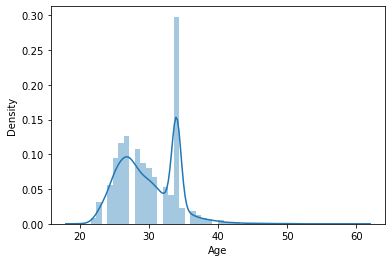

In [8]:
sns.distplot(df.Age);

Candidates are from age range of 22 to 38

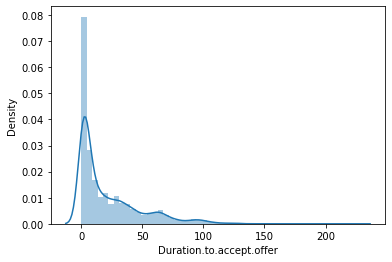

In [9]:
sns.distplot(df['Duration.to.accept.offer']);

Most of the candidates accept immediately

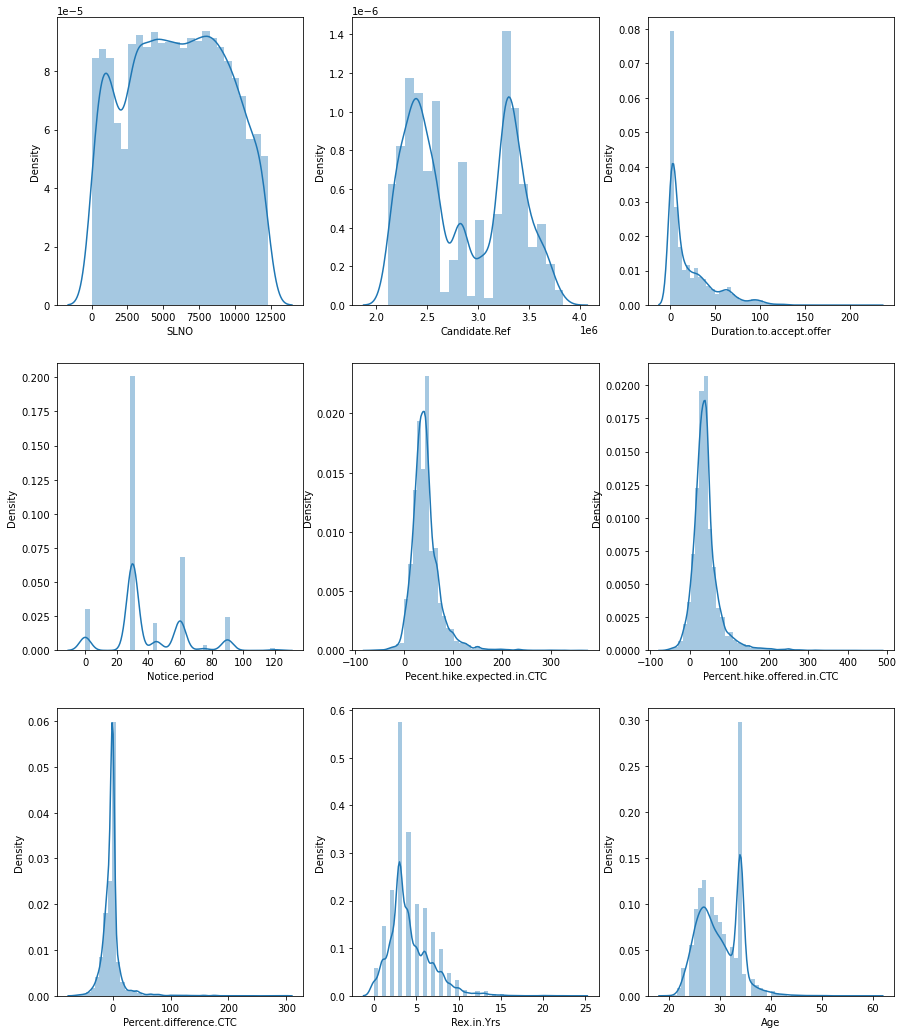

In [10]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 18))

for ax, col in list(zip(axes.flat, numerical_cols)):       
        sns.distplot(df[col], ax=ax)

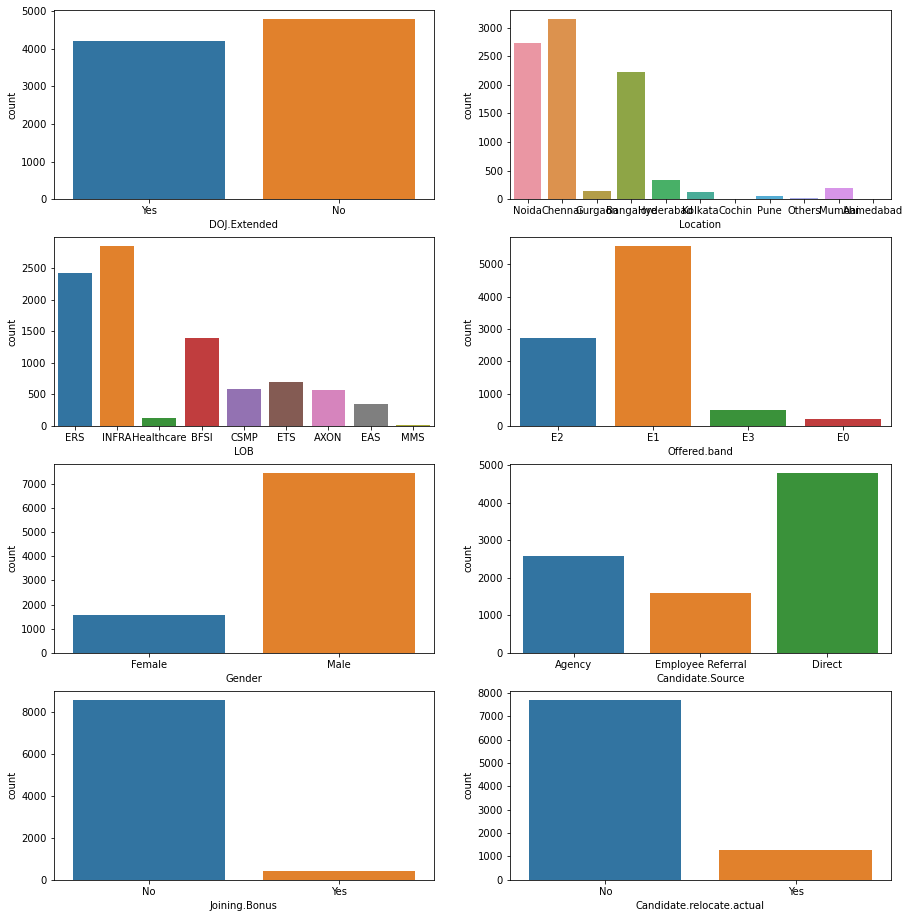

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 16))

for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.countplot(df[col], ax=ax)

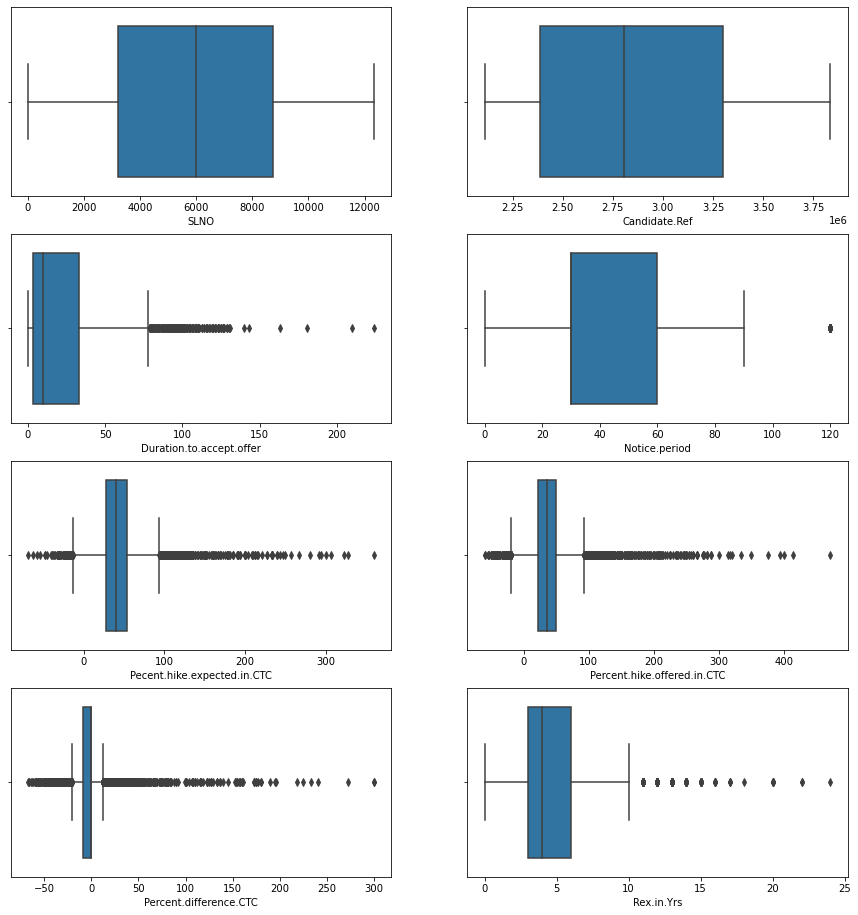

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 16))

for ax, col in list(zip(axes.flat, numerical_cols)):        
    sns.boxplot(df[col], ax=ax)

##Observations: Outliers in following columns
*1. Notice period
*2. Rex in yrs 
*3. Duration to accept offers
*4. and quite a lot in other percentage ctc columns

##Bivariate Analysis

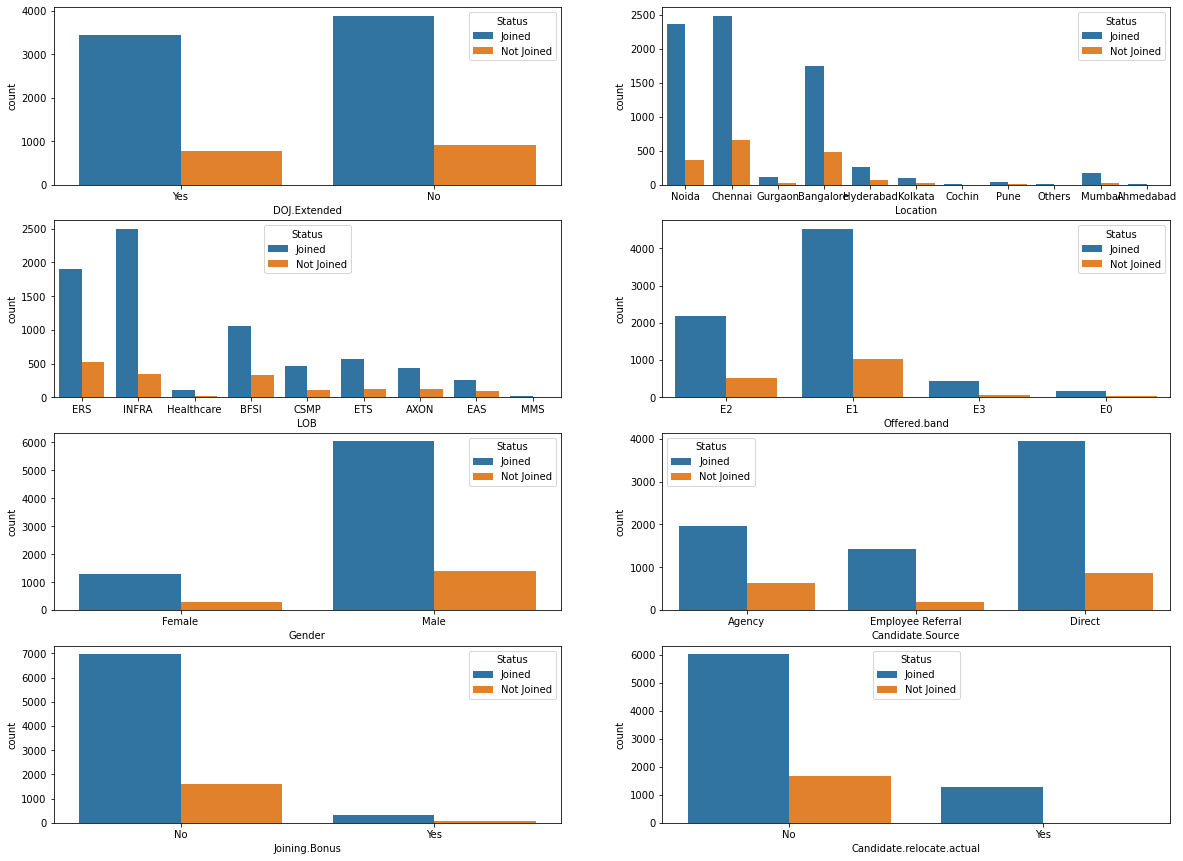

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

for ax, col in list(zip(axes.flat, categorical_cols)): 
    sns.countplot(df[col], hue=df['Status'], ax=ax)

##Observations:
*1. Most number of people joined are in INFRA and ERS
*2. Most people who were offered E1 band have joined
*3. Male and female have same number so there seems no differece
*4. Candidate who actually relocate joins.
*5. Chennai has most number of candidates join as well as not joined.
*6. If candidate comes from employee referral there is low chance of churning

##Correlation

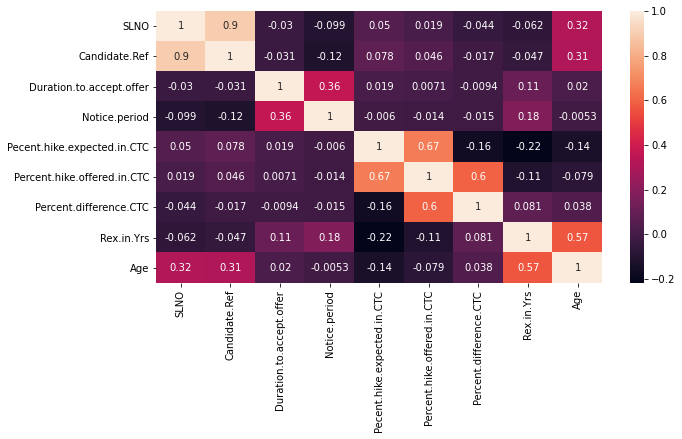

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True);

##Data Cleaning

In [15]:
df_cleaned = df.copy(deep=True)

In [16]:
df_cleaned.columns = df.columns.str.replace('.', '_') # replacing . by _ 

In [17]:
df_cleaned.pop('SLNO')
df_cleaned.pop('Candidate_Ref')

0       2110407
1       2112635
2       2112838
3       2115021
4       2115125
         ...   
8993    3835433
8994    3836076
8995    3822427
8996    3664089
8997    2556130
Name: Candidate_Ref, Length: 8998, dtype: int64

In [18]:
df_cleaned.drop(df_cleaned[df_cleaned['Notice_period']>100].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Rex_in_Yrs']>11].index,inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Duration_to_accept_offer']>135].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Pecent_hike_expected_in_CTC']>250].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Percent_hike_offered_in_CTC']>355].index, inplace=True)
df_cleaned.drop(df_cleaned[df_cleaned['Percent_difference_CTC']>200].index, inplace=True)

In [19]:
df_cleaned.head()

,DOJ_Extended,Duration_to_accept_offer,Notice_period,Offered_band,Pecent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,LOB,Location,Age,Status
0,Yes,14,30,E2,-20.79,13.16,42.86,No,No,Female,Agency,7,ERS,Noida,34,Joined
1,No,18,30,E2,50.00,320.00,180.00,No,No,Male,Employee Referral,8,INFRA,Chennai,34,Joined
2,No,3,45,E2,42.84,42.84,0.00,No,No,Male,Agency,4,INFRA,Noida,27,Joined
3,No,26,30,E2,42.84,42.84,0.00,No,No,Male,Employee Referral,4,INFRA,Noida,34,Joined
5,Yes,17,30,E1,42.83,42.83,0.00,No,No,Male,Employee Referral,2,INFRA,Noida,34,Joined


##Data Preprocessing

In [20]:
# Separating numerical and categorical collumns
all_cols = df_cleaned.columns
numerical_cols = df_cleaned._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)- set(numerical_cols))

##Standard Scaler

In [21]:
sc = StandardScaler()
df_cleaned[numerical_cols] = sc.fit_transform(df_cleaned[numerical_cols])

One Hot encoding

In [22]:
le = LabelEncoder()
df_cleaned['Status'] = le.fit_transform(df_cleaned['Status'])
df_cleaned['Joining_Bonus'] = le.fit_transform(df_cleaned['Joining_Bonus'])
df_cleaned['Candidate_relocate_actual'] = le.fit_transform(df_cleaned['Candidate_relocate_actual'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
df_cleaned['Candidate_Source'] = le.fit_transform(df_cleaned['Candidate_Source'])
df_cleaned['LOB'] = le.fit_transform(df_cleaned['LOB'])
df_cleaned['Location'] = le.fit_transform(df_cleaned['Location'])
df_cleaned['DOJ_Extended'] = le.fit_transform(df_cleaned['DOJ_Extended'])
df_cleaned['Offered_band'] = le.fit_transform(df_cleaned['Offered_band'])


In [23]:
df_cleaned.head()

,DOJ_Extended,Duration_to_accept_offer,Notice_period,Offered_band,Pecent_hike_expected_in_CTC,Percent_hike_offered_in_CTC,Percent_difference_CTC,Joining_Bonus,Candidate_relocate_actual,Gender,Candidate_Source,Rex_in_Yrs,LOB,Location,Age,Status
0,1,-0.282029,-0.410485,2,-2.270100,-0.801363,2.482401,0,0,0,0,1.297883,4,8,1.060723,0
1,0,-0.123540,-0.410485,2,0.212422,8.207313,10.100461,0,0,1,2,1.742702,7,2,1.060723,0
2,0,-0.717873,0.286309,2,-0.038671,0.070028,0.101548,0,0,1,0,-0.036575,7,8,-0.701547,0
3,0,0.193438,-0.410485,2,-0.038671,0.070028,0.101548,0,0,1,2,-0.036575,7,8,1.060723,0
5,1,-0.163162,-0.410485,1,-0.039022,0.069734,0.101548,0,0,1,2,-0.926214,7,8,1.060723,0


##Model Building

In [24]:
y = df_cleaned.pop('Status')
X = df_cleaned

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [26]:
def Classify(clf):
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print('Accuracy: ',accuracy_score(y_test, preds))
    print('Classification Report: \n ',classification_report(y_test, preds))
    print('Confusion Matrix \n', confusion_matrix(y_test, preds))

##Logistic Regression

In [27]:
lr = LogisticRegression()
Classify(lr)

Accuracy:  0.8194633924511141
Classification Report: 
                precision    recall  f1-score   support

           0       0.83      0.99      0.90      1800
           1       0.52      0.06      0.10       399

    accuracy                           0.82      2199
   macro avg       0.67      0.52      0.50      2199
weighted avg       0.77      0.82      0.76      2199

Confusion Matrix 
 [[1779   21]
 [ 376   23]]


##Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
Classify(dt)

Accuracy:  0.734424738517508
Classification Report: 
                precision    recall  f1-score   support

           0       0.85      0.82      0.83      1800
           1       0.30      0.35      0.33       399

    accuracy                           0.73      2199
   macro avg       0.58      0.59      0.58      2199
weighted avg       0.75      0.73      0.74      2199

Confusion Matrix 
 [[1474  326]
 [ 258  141]]


##Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
rfe = RandomForestClassifier(n_estimators = 20)
Classify(rfe)

Accuracy:  0.8208276489313324
Classification Report: 
                precision    recall  f1-score   support

           0       0.84      0.97      0.90      1800
           1       0.52      0.15      0.23       399

    accuracy                           0.82      2199
   macro avg       0.68      0.56      0.56      2199
weighted avg       0.78      0.82      0.78      2199

Confusion Matrix 
 [[1746   54]
 [ 340   59]]


##AdaBoost Classifier

In [30]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
Classify(adab)

Accuracy:  0.8221919054115507
Classification Report: 
                precision    recall  f1-score   support

           0       0.83      0.98      0.90      1800
           1       0.55      0.11      0.18       399

    accuracy                           0.82      2199
   macro avg       0.69      0.54      0.54      2199
weighted avg       0.78      0.82      0.77      2199

Confusion Matrix 
 [[1766   34]
 [ 357   42]]


AdaBoost seems to have Lowest number of False negatives

##Trying With Feature Importance

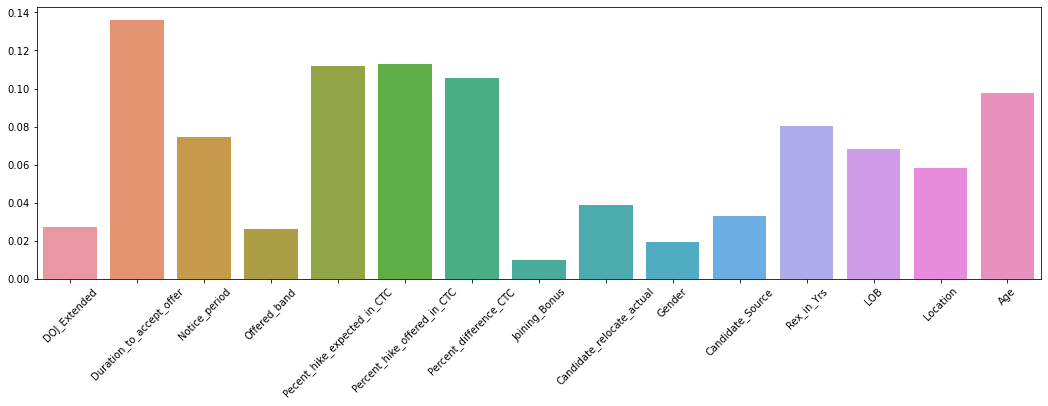

In [31]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)
plt.figure(figsize=(18,5))
sns.barplot(x=df_cleaned.columns, y=model.feature_importances_);
plt.xticks(rotation=45);

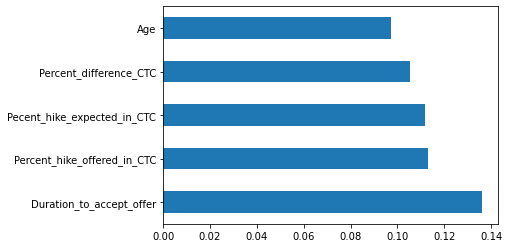

In [32]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh');

In [33]:
df_cleaned.columns

Index(['DOJ_Extended', 'Duration_to_accept_offer', 'Notice_period',
       'Offered_band', 'Pecent_hike_expected_in_CTC',
       'Percent_hike_offered_in_CTC', 'Percent_difference_CTC',
       'Joining_Bonus', 'Candidate_relocate_actual', 'Gender',
       'Candidate_Source', 'Rex_in_Yrs', 'LOB', 'Location', 'Age'],
      dtype='object')

In [34]:
df_select_f = df_cleaned[['Age','Percent_difference_CTC','Pecent_hike_expected_in_CTC','Percent_hike_offered_in_CTC','Duration_to_accept_offer']]

In [35]:
X_selected_f = df_select_f
y_select_f = y

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_f, y_select_f, random_state=0)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rfe = RandomForestClassifier(n_estimators = 20)
Classify(rfe)

Accuracy:  0.7944520236471123
Classification Report: 
                precision    recall  f1-score   support

           0       0.83      0.95      0.88      1800
           1       0.30      0.10      0.15       399

    accuracy                           0.79      2199
   macro avg       0.56      0.52      0.52      2199
weighted avg       0.73      0.79      0.75      2199

Confusion Matrix 
 [[1707   93]
 [ 359   40]]


In [38]:
from sklearn.ensemble import AdaBoostClassifier
adab = AdaBoostClassifier()
Classify(adab)

Accuracy:  0.8217371532514779
Classification Report: 
                precision    recall  f1-score   support

           0       0.82      1.00      0.90      1800
           1       0.68      0.03      0.06       399

    accuracy                           0.82      2199
   macro avg       0.75      0.51      0.48      2199
weighted avg       0.80      0.82      0.75      2199

Confusion Matrix 
 [[1794    6]
 [ 386   13]]


In [ ]:
# model and score with table # other clasification support vector machine , KNN, nabayes